# 4. 模型训练

## 4.1 处理样本不平衡

前面提到，目标列Class呈现较大的样本不平衡，会对模型学习造成困扰。样本不平衡常用的解决方法有过采样和欠采样，本项目处理样本不平衡采用的是过采样的方法，具体操作使用SMOTE（Synthetic Minority Oversampling Technique）。

【处理样本不平衡】

1.欠采样

    基本思想：减少多数类样本来提高少数类的分类性能。
    缺点：会丢失多数类的一些重要信息，不能够充分利用已有的信息。

2.过采样

    基本思想：增加少数类样本来提高少数类的分类性能。

【处理样本不平衡之过采样方法】

1.随机过采样
    
基本思想：通过简单复制样本来增加少数类样本；

缺点：容易产生模型过拟合，即使得模型学习到的信息过于特别(Specific)而不够泛化(General)

2.SMOTE（Synthetic Minority Oversampling Technique合成少数类过采样技术）
    
基本思想：对少数类样本进行分析并根据少数类样本人工合成新样本添加到数据集中，使得原始数据中的类别不再严重失衡
    
算法流程：[网址：https://blog.csdn.net/Yaphat/article/details/52463304?locationNum=7]

    ·采样最邻近算法，计算出每个少数类样本的K个近邻；
    ·从K个近邻中随机挑选N个样本进行随机线性插值；
    ·构造新的少数类样本；
    ·将新样本与原数据合成，产生新的训练集；

In [47]:
# 构建自变量和因变量
X = data[x_feature] #提取的18个特征
y = data["Class"]   #真实值（label）

n_sample = y.shape[0] #y.shape=[样本数量,1] ; n_sample=y.shape[0]=样本总个数
n_pos_sample = y[y == 0].shape[0] #n_pos_sample=信用卡未被欺诈样本个数
n_neg_sample = y[y == 1].shape[0] #n_neg_sample=信用卡被欺诈样本个数
print('样本个数：{}; 正样本占{:.2%}; 负样本占{:.2%}'.format(n_sample,
                                                   n_pos_sample / n_sample,
                                                   n_neg_sample / n_sample)) #输出：样本总个数，未被欺诈和被欺诈样本占比
print('特征维数：', X.shape[1]) #X.shape=[样本数量，特征数量]

样本个数：284807; 正样本占99.83%; 负样本占0.17%
特征维数： 18


In [49]:
# 导入SMOTE算法模块
from imblearn.over_sampling import SMOTE 

【SMOTE函数参数说明】

SMOTE(ratio=’auto’, random_state=None, k_neighbors=5, m_neighbors=10,
     out_step=0.5, kind=’regular’, svm_estimator=None, n_jobs=1)

    ·ratio：重抽样的比例；
    ·random_state：随机数生成器的种子；
    ·k_neighbors：指定近邻个数，默认为5个；
    ·m_neighbors：指定从近邻样本中随机挑选的样本个数，默认为10个；
    ·kind：指定SMOTE算法在生成新样本时所使用的选项，
         默认为’regular’，表示对少数类别的样本进行随机采样，
         也可以是’borderline1’、’borderline2’和’svm’；
    ·svm_estimator：指定SVM分类器，默认为sklearn.svm.SVC，
               该参数的目的是利用支持向量机分类器生成支持向量，然后再生成新的少数类别的样本；
    ·n_jobs：指定SMOTE算法在过采样时所需的CPU数量，默认为1表示仅使用1个CPU运行算法，即不使用并行运算功能；

In [52]:
# 处理不平衡数据
sm = SMOTE(random_state=42)    # 处理过采样的方法（增加少量样本）
X, y = sm.fit_sample(X, y)     # 过采样+拟合样本
print('通过SMOTE方法平衡正负样本后')
n_sample = y.shape[0]             # y.shape=[样本总个数,1] ; n_sample=样本总个数
n_pos_sample = y[y == 0].shape[0] # 信用卡未被欺诈样本个数
n_neg_sample = y[y == 1].shape[0] # 信用卡被欺诈样本个数
print('样本个数：{}; 正样本占{:.2%}; 负样本占{:.2%}'.format(n_sample,n_pos_sample/n_sample,n_neg_sample/n_sample))
 # 输出：样本总个数，未被欺诈和被欺诈样本占比

通过SMOTE方法平衡正负样本后
样本个数：568630; 正样本占50.00%; 负样本占50.00%


## 4.2 构建分类器进行训练

In [55]:
# import sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [53]:

clf1 = LogisticRegression() # 构建逻辑回归分类器
clf1.fit(X, y)              # 拟合数

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## 4.3 预测结果

In [56]:
predicted1 = clf.predict(X) # 通过分类器产生预测结果
print("Test set accuracy score: {:.5f}".format(accuracy_score(predicted1, y,)))
#输出 分类准确率 = 正确分类样本数/样本总个数

Test set accuracy score: 0.90153


In [59]:
import itertools #利用itertools可以创建属于自己的迭代器，这些迭代器可用于有效的遍历
from itertools import cycle

itertools中的cycle迭代器允许开发者在一个序列上创建一个无限循环的迭代器。

[网址：https://blog.csdn.net/n9nzjx57bf/article/details/72518231]

In [60]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    # plt.imshow(): 函数用于将图片放入显示窗口中，但并不会弹出窗口。
    # 有三个参数：图像的nparray，显示类型cmap（如颜色等），插值算法。
    # interpolation：选择插值算法，填补图像由于拉伸放大造成的不平滑的像素块，保持一定的图片质量。
    plt.title(title) # 图像的主题
    plt.colorbar()   # 画柱形图
    tick_marks = np.arange(len(classes)) # 生成序列
    plt.xticks(tick_marks, classes, rotation=0)
    # 设置x轴记号
    # 第一个参数为记号的坐标
    # 第二个参数为记号的内容
    # rotation:更改绘制x轴标签方向（与水平方向的逆时针夹角度数）
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    
    # itertools.product(*iterables[, repeat])
    # *iterables为迭代器(对象) 
    # repeat为迭代次数，默认为1
    # 返回迭代对应值
    # 例子》list1 = ['a', 'b']
    #     》list2 = ['c', 'd']
    #     》for i in itertools.product(list1, list2):
    #     》   print i
    # 输出
    # ('a', 'c')
    # ('a', 'd')
    # ('b', 'c')
    # ('b', 'd')
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])): # 返回（0，0），（1，0）
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    #plt.text()
    # 第一个参数是x轴坐标
    # 第二个参数是y轴坐标
    # 第三个参数是要显式的内容（混淆矩阵中的值）

    plt.tight_layout() # 调整每个子图之间的距离
    plt.ylabel('True label') # 添加y轴标签
    plt.xlabel('Predicted label') # 添加x轴标签

【生成混淆矩阵】

sklearn.metrics.confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)

    ·y_true: 是样本真实分类结果
    ·y_pred: 是样本预测分类结果 
    ·labels：是所给出的类别，通过这个可对类别进行选择 
    ·sample_weight : 样本权重


Recall metric in the testing dataset:  0.8031690202768057


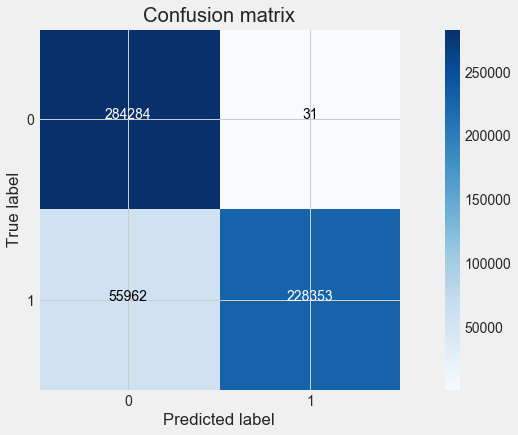

In [61]:

# Compute confusion matrix
cnf_matrix = confusion_matrix(y, predicted1)  # 生成混淆矩阵（真实值，预测值）
np.set_printoptions(precision=2)              #设置打印时显示方式

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
#输出 召回率（recall）R = 被诈已检测/(被诈已检测+被诈未检测)

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix') # 打印混淆矩阵
plt.show()

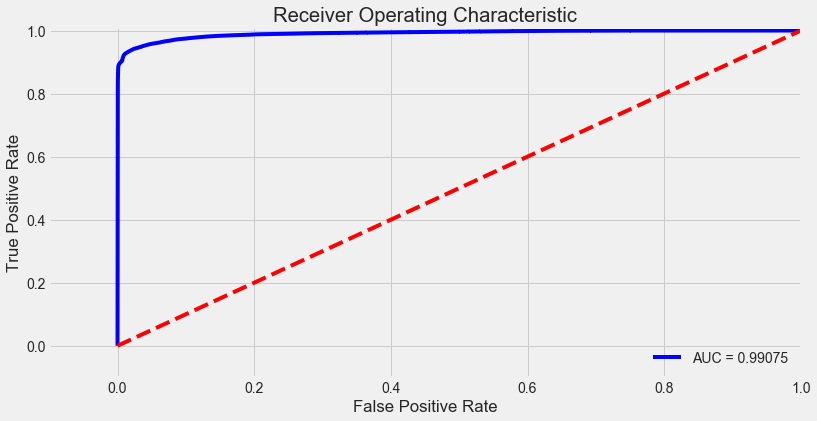

In [64]:
y_pred1_prob = clf1.predict_proba(X)[:, 1]
# clf1.predict_proba(X)返回的是一个n行k列的数组
# 第i行第j列上的数值是模型预测第i个预测样本的标签为j的概率。
# 每一行的和应该等于1
# 此处y_pred1_prob=所有样本被诈概率

fpr, tpr, thresholds = roc_curve(y,y_pred1_prob) 
#  网址：https://blog.csdn.net/ybdesire/article/details/51999995
#  函数roc_curve得到
#  fpr=FP/(TN+FP)：未被诈未检测/（未被诈未检测+未被诈已检测）
#  tpr= TP/(TP+FN)：被诈已检测/（被诈已检测+被诈未检测）=召回率
# y:真实值
# 截断点：y_pred1_prob中低于某一阈值（默认0.5）就认为是反例（被诈）
roc_auc = auc(fpr,tpr)
# ROC曲线的面积就是AUC（Area Under the Curve）
# AUC用于衡量“二分类问题”机器学习算法性能（泛化能力）
# 网址：https://blog.csdn.net/zwqjoy/article/details/78793162

# 绘制 ROC曲线
plt.title('Receiver Operating Characteristic') #标题
plt.plot(fpr, tpr, 'b',label='AUC = %0.5f'% roc_auc) 
# 叠加图：plot(X,S, color="red", linewidth=2.5, linestyle="-", label="sine")
# X：横坐标
# S：纵坐标
plt.legend(loc='lower right')
#添加图例
plt.plot([0,1],[0,1],'r--') # 画反对角线（用于参考）
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
#细化横轴和纵轴的设置，设置横轴、纵轴的界限以及标注
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()